In [30]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
from wbfm.utils.projects.finished_project_data import ProjectData
import napari
import pandas as pd
from tqdm.auto import tqdm
import numpy as np
from collections import defaultdict
import zarr
import os

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Loading all projects

In [3]:
# fname = "/home/charles/dlc_stacks/worm1_for_students/project_config-workstation.yaml"
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1/project_config.yaml"
project_data1 = ProjectData.load_final_project_data_from_config(fname)

Annotations are already stable style
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm1 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [4]:
# Same project, but remote = most updated
# fname = "/home/charles/dlc_stacks/students-worm4-reanalysis/project_config-workstation.yaml"
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4/project_config.yaml"
project_data2 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round1_worm4 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [5]:
# # Partial... still uint8
# fname = "/home/charles/dlc_stacks/round2-worm6-short-newseg/project_config-workstation.yaml"
# project_data3 = ProjectData.load_final_project_data_from_config(fname, to_load_frames=True)

In [6]:
# REMOTE
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3/project_config.yaml"
project_data4 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/round2_worm3 
Found the following data files:
============Raw========================
red_data:                 False
green_data:               False
============Annotations================
manual_tracking:          True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [7]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5/project_config.yaml"
project_data_gfp1 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/gfp_ZIM2319_worm5 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [8]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5/project_config.yaml"
project_data_bright1 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
Annotations are already stable style
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm5 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          True
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [9]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm7/project_config.yaml"
project_data_bright2 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : WARNING  Project does not have a behavior config file
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/manually_annotated/bright_worm7 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [10]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12/project_config.yaml"
project_data1_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright6-2022_07_12 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [11]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30/project_config.yaml"

project_data2_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright7-2022_06_30 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [12]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30/project_config.yaml"
project_data3_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright8-2022_06_30 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [13]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30/project_config.yaml"
project_data4_C = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : WARNING  Did not find at least one centerline related file: [None, None, None]
ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/incomplete/C-NewBright9-2022_06_30 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [14]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm1-2022_08_02/project_config.yaml"
project_data1_exp12 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm1-2022_08_02 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [15]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm2-2022_08_02/project_config.yaml"
project_data2_exp12 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm2-2022_08_02 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [17]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm3-2022_08_01/project_config.yaml"
project_data3_exp12 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm3-2022_08_01 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [18]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm4-2022_08_02/project_config.yaml"
project_data4_exp12 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm4-2022_08_02 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [19]:
# fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm1-2022_08_02/project_config.yaml"
# project_data1_exp12 = ProjectData.load_final_project_data_from_config(fname)

In [20]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm6-2022_08_01/project_config.yaml"
project_data6_exp12 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm6-2022_08_01 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [21]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm11-2022_08_02/project_config.yaml"
project_data11_exp12 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm11-2022_08_02 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



In [22]:
fname = "/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm12-2022_08_01/project_config.yaml"
project_data12_exp12 = ProjectData.load_final_project_data_from_config(fname)

ConfigFile  : INFO     =======================================
Project data for directory:
/scratch/neurobiology/zimmer/Charles/dlc_stacks/exposure_12ms/C-exp12_worm12-2022_08_01 
Found the following data files:
============Raw========================
red_data:                 True
green_data:               True
============Annotations================
manual_tracking:          False
============Segmentation===============
raw_segmentation:         True
colored_segmentation:     True
============Traces=====================
red_traces:               True
green_traces:             True



# Convinience function

In [25]:

def calc_hist(df, t=1000):
    green_means = df.loc[:t, (slice(None), 'intensity_image')] / df.loc[:t, (slice(None), 'area')].values
    green_means -= np.min(green_means)  # Some of them have different background due to postprocessing
    
    green_mean_of_means = green_means.median(axis=0, skipna=True, numeric_only=True)
    
    return green_mean_of_means

In [31]:
save_dir = 'histograms_of_brightness'

# Type 1: original projects

## Calculate the histogram of raw green brightnesses for first 100 time points

In [38]:
all_projects = [project_data1, project_data2, project_data4]
# all_projects = [project_data1, project_data2, project_data4, project_data5, project_data6]


In [39]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

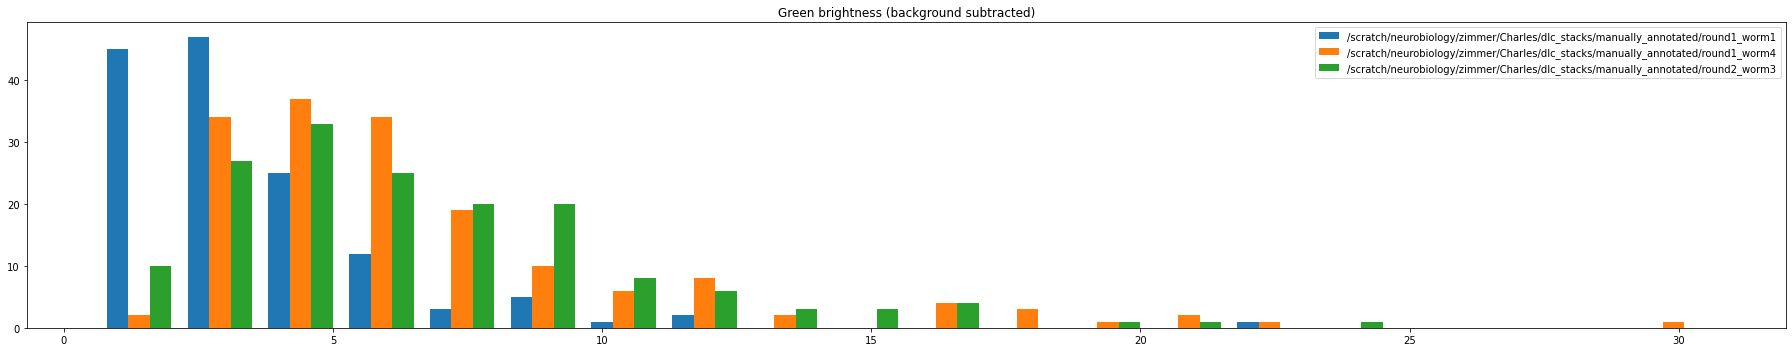

In [40]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'laser600_green.png')
plt.savefig(fname)

In [41]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

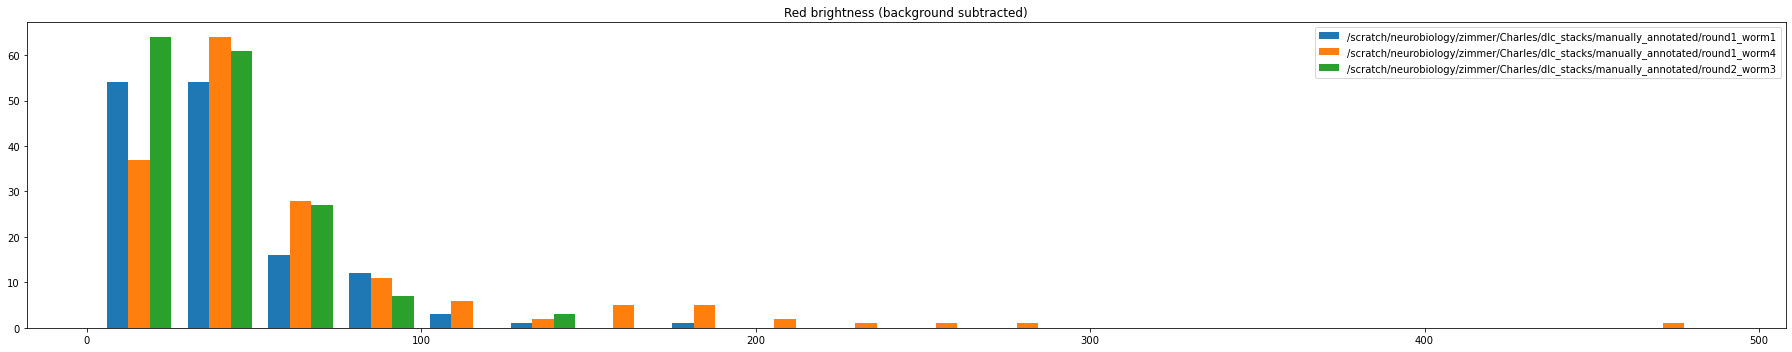

In [42]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'laser600_red.png')
plt.savefig(fname)

# Type 2: the old bright worms

In [45]:
all_projects = [project_data_bright1, project_data_bright2]


In [46]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

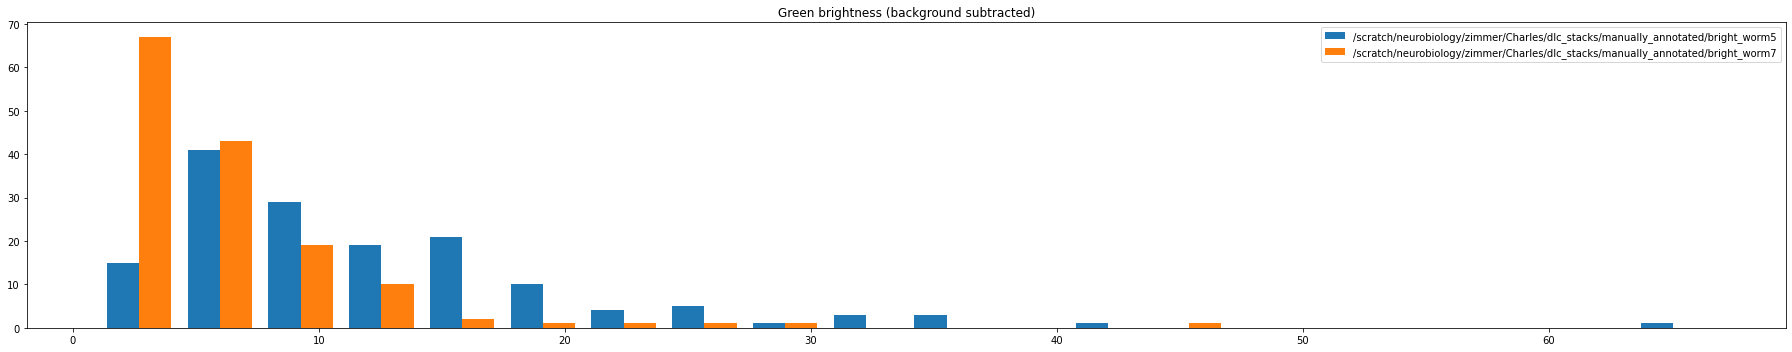

In [47]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'laser800_old_green.png')
plt.savefig(fname)

In [48]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

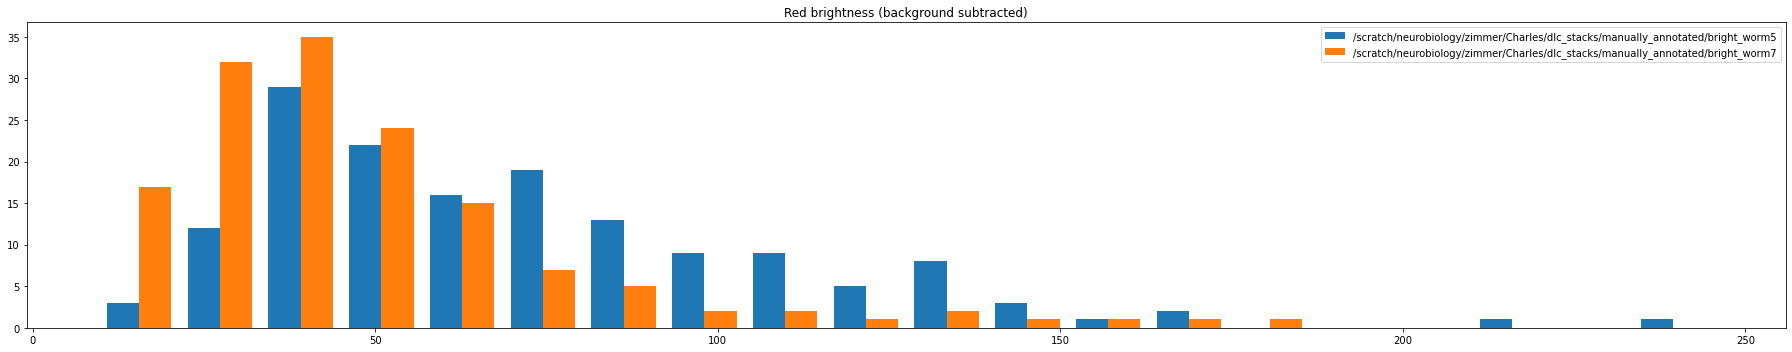

In [49]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'laser800_old_red.png')
plt.savefig(fname)

# Type 3: GFP

In [88]:
all_projects = [project_data_gfp1]


In [89]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Green brightness (background subtracted)')

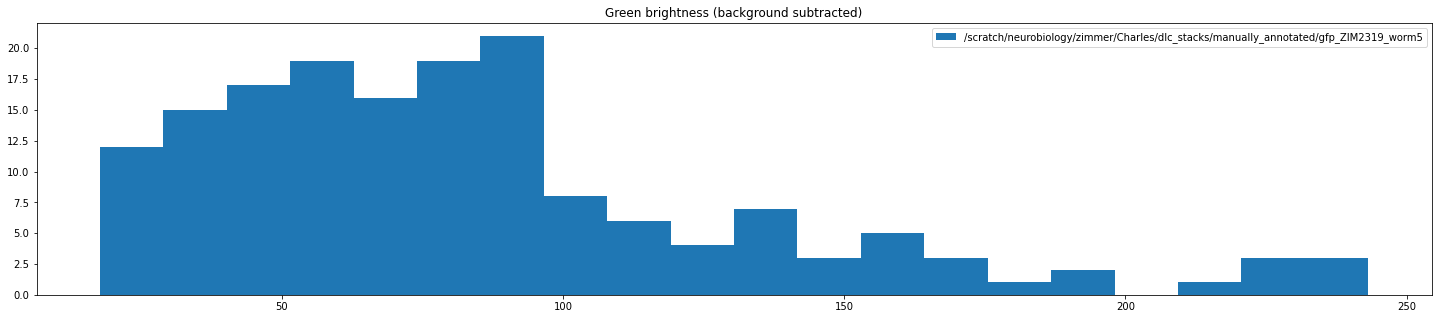

In [90]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

In [91]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

Text(0.5, 1.0, 'Red brightness (background subtracted)')

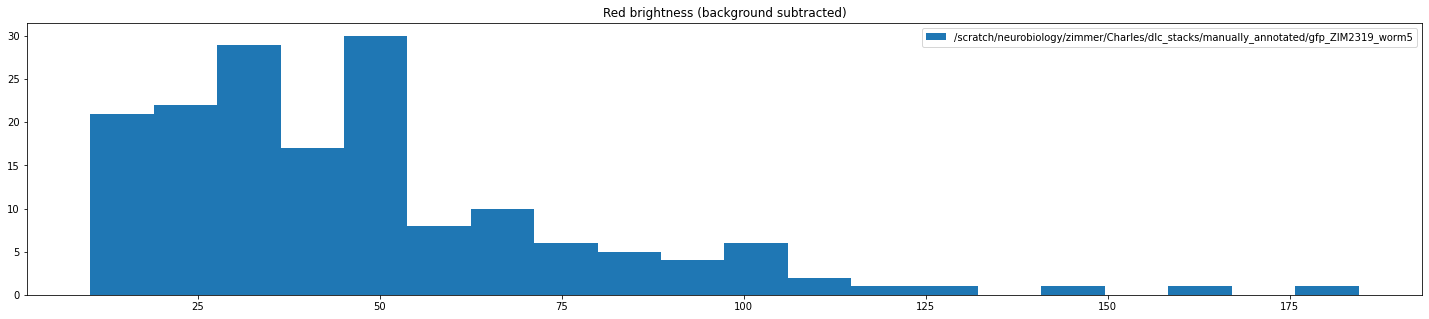

In [92]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

# Type 4: new bright worms

In [50]:
all_projects = [project_data1_C, project_data2_C, project_data3_C, project_data4_C]


In [51]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

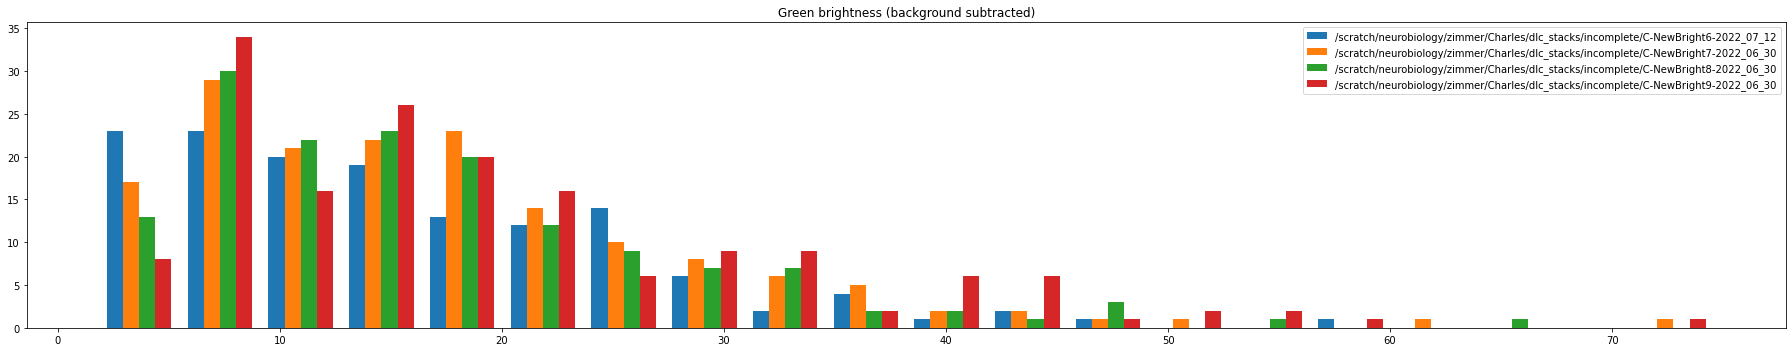

In [52]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'laser800_new_green.png')
plt.savefig(fname)

In [53]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

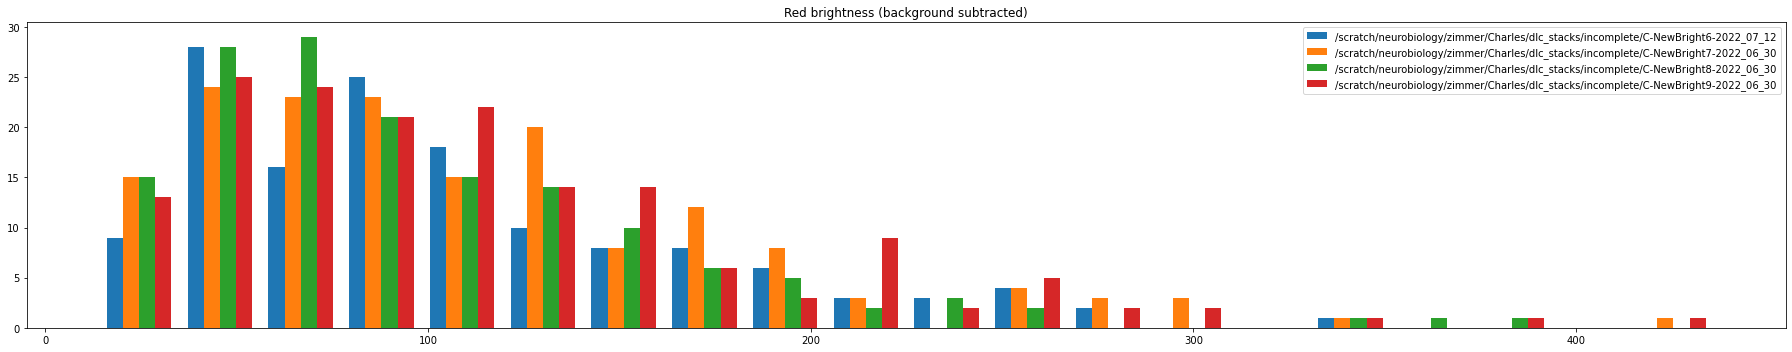

In [54]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'laser800_new_red.png')
plt.savefig(fname)

# Type 5: 12ms exposure

In [55]:
all_projects = [project_data1_exp12, project_data2_exp12, project_data3_exp12, project_data4_exp12, project_data6_exp12, project_data11_exp12, project_data12_exp12]


In [56]:
all_greens = [calc_hist(p.green_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

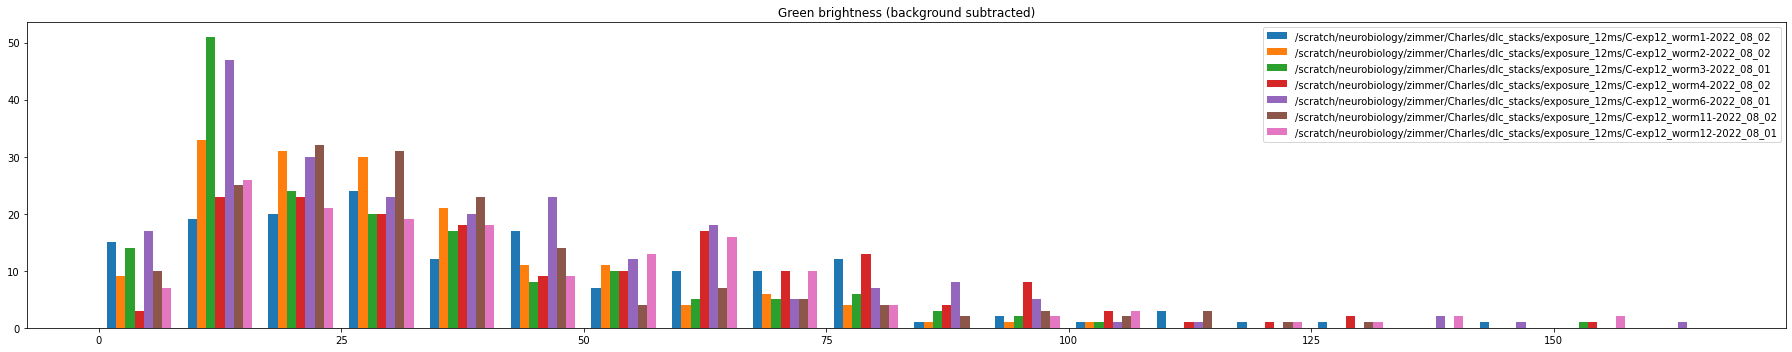

In [57]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Green brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'exposure12_green.png')
plt.savefig(fname)

In [58]:
all_greens = [calc_hist(p.red_traces) for p in all_projects]
labels = [p.project_dir for p in all_projects]

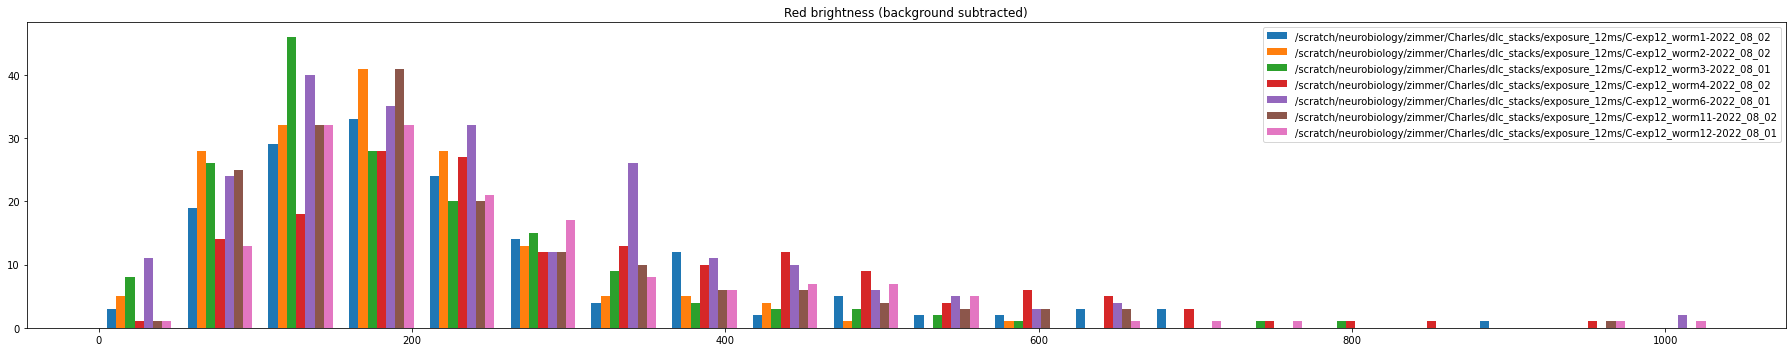

In [59]:
plt.figure(figsize=(25,5))
plt.hist(all_greens, bins=20);
plt.legend(labels)
plt.title("Red brightness (background subtracted)")

plt.tight_layout()
fname = os.path.join(save_dir, 'exposure12_red.png')
plt.savefig(fname)

# Scratch

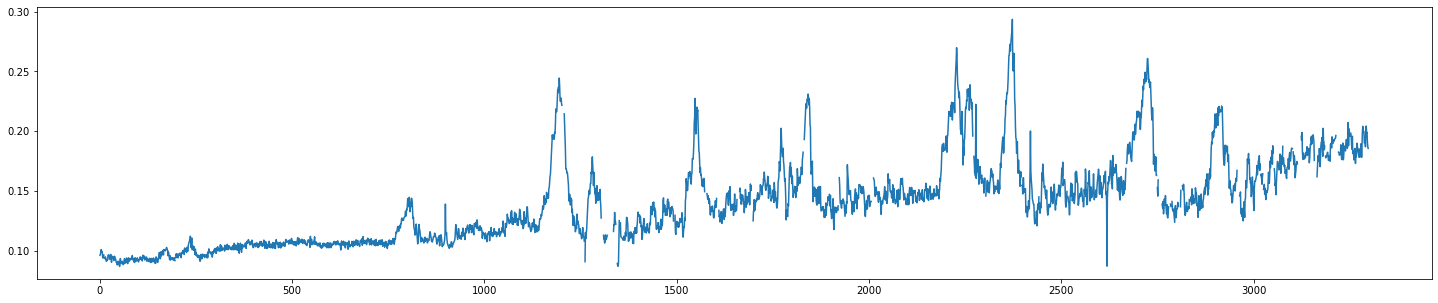

In [98]:
neuron = 'neuron_033'

back = project_data1.green_traces[neuron]['area'] * 100
y = (project_data1.green_traces[neuron]['intensity_image'] - back) / (project_data1.red_traces[neuron]['intensity_image'] - back)
plt.figure(figsize=(25,5))
plt.plot(y)